<a href="https://colab.research.google.com/github/justingivens9583/CS4410-JG/blob/master/CS4410_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 6

##Installing Required Packages

In [4]:
!pip install requests
!pip install textblob
!pip install wordcloud
!pip install imageio

##Importing Libraries and Downloading NLTK Data

In [5]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Importing Additional Libraries

In [6]:
import requests
from textblob import TextBlob
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import imageio
import numpy as np
from operator import itemgetter

##Downloading Hamlet Text

In [7]:
target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

##Loading the Mask Image for Word Cloud

In [8]:
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

<ipython-input-8-1304c8f3f9d3>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


##Creating a TextBlob and Processing the Text

In [9]:
blob = TextBlob(data)

stop_words = stopwords.words('english')

items = blob.word_counts.items()

items = [item for item in items if item[0] not in stop_words]

##Sorting the Words and Preparing Data for Plotting

In [12]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

top20 = sorted_items[:20]

df = pd.DataFrame(top20, columns=['word', 'count'])

##Plotting the Top 20 Word Frequencies

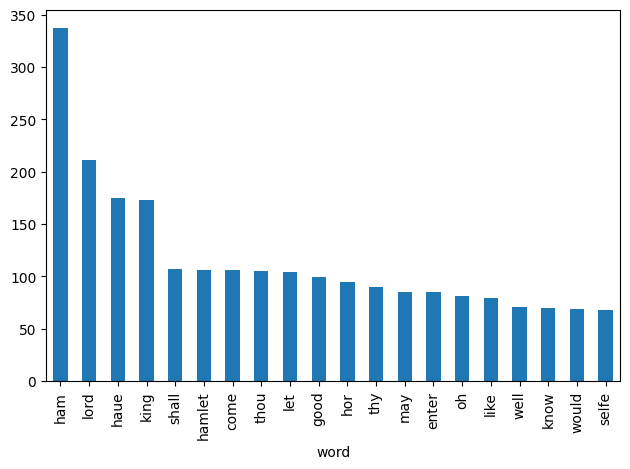

In [13]:
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()
plt.show()

##Generating and Displaying the Word Cloud

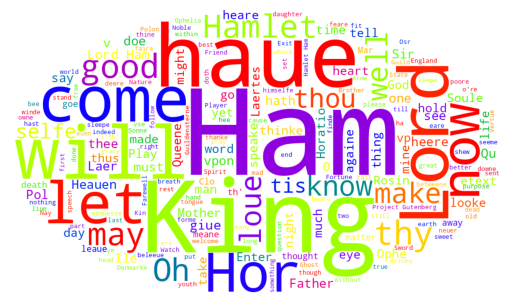

In [14]:
wordcloud = WordCloud(
    colormap='prism',
    mask=mask_image,
    background_color='white'
)

wordcloud = wordcloud.generate(data)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()